# Importing Libraries

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Training Dataset

In [142]:
# Loading the dataset
data=pd.read_csv("C:/Users/salon/Desktop/projects/ML/Loan Prediction/loan-train.csv")

# Displaying the first 5 rows of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [143]:
#To find the number of rows and columns of the Dataset
data.shape

(614, 13)

In [144]:
#To find the summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [145]:
#to find the descriptive statistics of the data set
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [146]:
# to create a cross-tabulation, which displays the frequency of occurrences between two or more variables i.e. Credit history and loan status
pd.crosstab(data['Credit_History'], data["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


# Exploratory Data Analysis

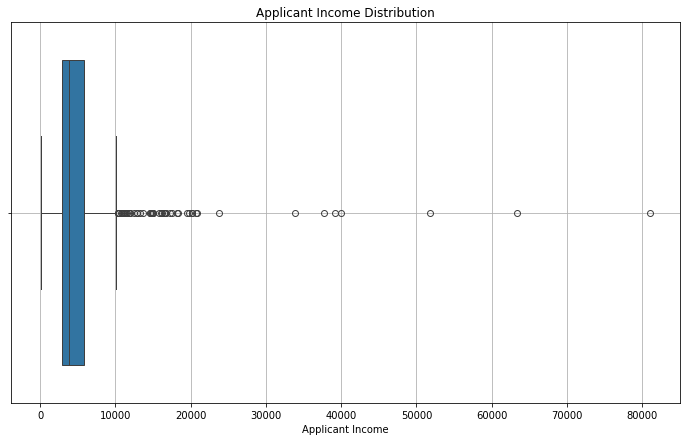

In [147]:
plt.figure(figsize=(12,7))
sns.boxplot(x=data["ApplicantIncome"])
plt.title("Applicant Income Distribution")
plt.xlabel("Applicant Income")
plt.grid()
plt.show()

The box plot above represents the distribution of applicant incomes. The majority of incomes are concentrated in a narrow range, as indicated by the compact interquartile range (IQR), with the median income lying close to the lower end of the scale. The whiskers extend to show the spread of most of the data, but several outliers are present, representing applicants with significantly higher incomes. These outliers extend up to 80,000, highlighting a right-skewed distribution where a small number of applicants earn substantially more than the majority. This suggests a highly unequal income distribution among the applicants.

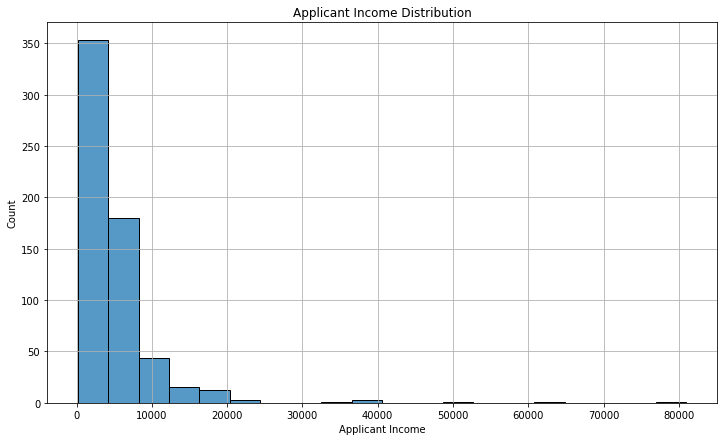

In [148]:
plt.figure(figsize=(12,7))
sns.histplot(data["ApplicantIncome"], bins=20, kde=False)  # kde=False to remove the KDE curve
plt.title("Applicant Income Distribution")
plt.grid()
plt.xlabel("Applicant Income")
plt.show()

The histogram illustrates the distribution of applicant incomes, showing a heavily right-skewed pattern. The majority of applicants earn less than 10,000, with the highest concentration in the 0–5,000 range. As income levels increase, the frequency of applicants decreases significantly, creating a long tail. A small number of outliers with incomes exceeding 40,000 are present, but they occur at very low frequencies. This visualization reinforces the presence of income inequality in the dataset, with most applicants belonging to the low-income category and a few high-income earners forming the extreme upper end of the distribution.

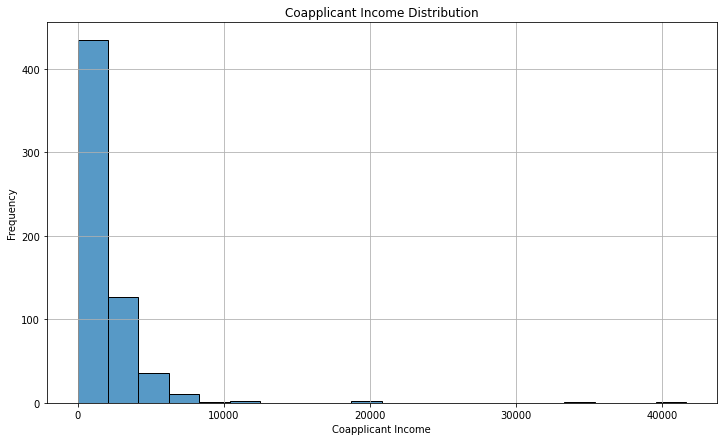

In [149]:
plt.figure(figsize=(12,7))
sns.histplot(data["CoapplicantIncome"], bins=20, kde=False)  # kde=False to remove the KDE curve
plt.title("Coapplicant Income Distribution")
plt.xlabel("Coapplicant Income")
plt.ylabel("Frequency")
plt.grid()
plt.show()

The histogram illustrates the distribution of coapplicant incomes, revealing a strong right-skewed pattern. The majority of coapplicants have little to no income, as shown by the high frequency in the lowest income range (0–5,000). The frequency of coapplicants decreases rapidly as income levels increase, with very few coapplicants earning above 10,000. A small number of outliers with incomes exceeding 20,000 are present, but they occur infrequently. This distribution suggests that most coapplicants have minimal financial contributions, with only a handful earning significantly higher incomes, highlighting a disparity in income levels among coapplicants.


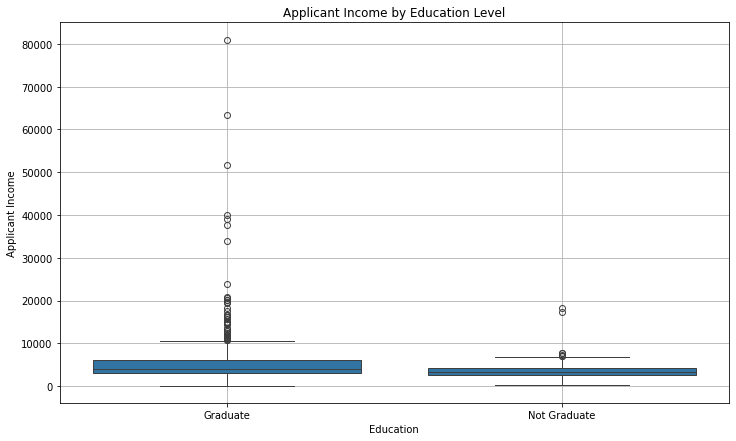

In [150]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Education", y="ApplicantIncome", data=data)
plt.title("Applicant Income by Education Level")
plt.suptitle('')  # To remove the default 'by Education' title generated by boxplot
plt.xlabel("Education")
plt.ylabel("Applicant Income")
plt.grid()
plt.show()

The boxplot compares applicant incomes based on education levels (Graduate vs. Not Graduate). Graduates generally exhibit higher median incomes and a wider income range compared to non-graduates. While both groups display similar interquartile ranges (IQR), graduates have more extreme outliers, with incomes reaching up to 80,000, indicating greater earning variability. Non-graduates, on the other hand, show a slightly narrower income distribution with fewer high-income outliers. Overall, the plot suggests that education level may play a role in income potential, with graduates tending to earn more and display greater income variability.

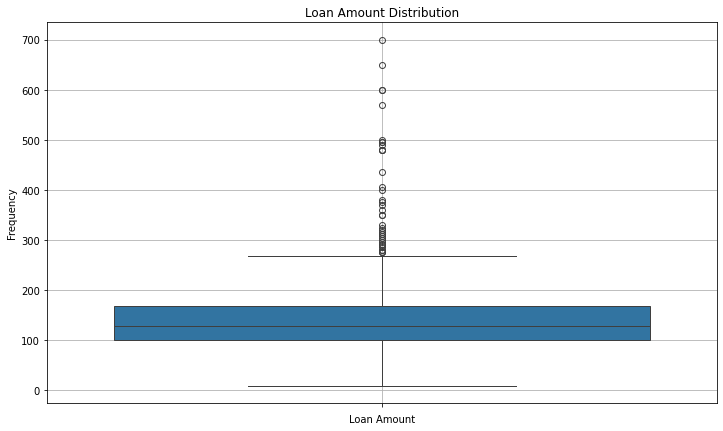

In [151]:
plt.figure(figsize=(12,7))
sns.boxplot(y="LoanAmount", data=data)
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.grid()
plt.show()

This boxplot illustrates the distribution of loan amounts. The x-axis represents the loan amount, while the y-axis indicates the frequency. The central box shows the interquartile range (IQR), with the middle line representing the median loan amount. 
The majority of loan amounts fall within a consistent range, as indicated by the compact box. However, there are several outliers where the loan amounts extend far beyond the upper whisker, reaching values up to 700. These extreme values suggest that while most loans are moderate in size, a few exceptionally high loan amounts significantly exceed the typical range. The plot indicates a skewed distribution with a concentration around the median and a long tail of higher loan amounts.

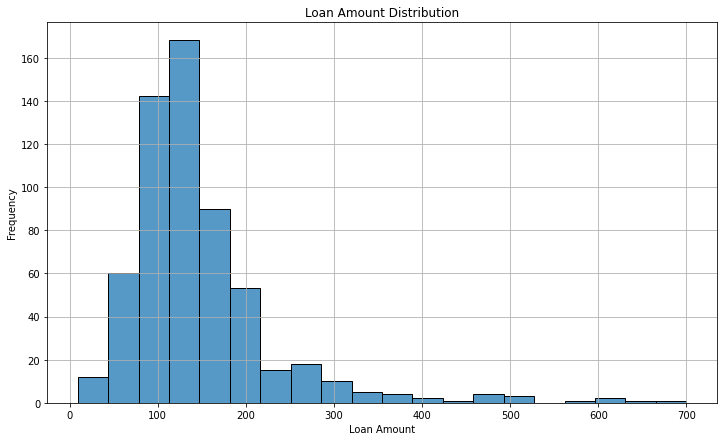

In [152]:
plt.figure(figsize=(12,7))
sns.histplot(data["LoanAmount"], bins=20, kde=False)  # kde=False to remove the KDE curve
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.grid()
plt.show()

This histogram represents the distribution of loan amounts.The plot reveals that the majority of loan amounts are clustered between 100 and 200, with the highest frequency occurring around 150. As the loan amount increases beyond 200, the frequency gradually declines, creating a right-skewed distribution. A small number of loans exceed 400, with very few reaching amounts as high as 600 or 700. This indicates that most loans are relatively moderate in size, with fewer instances of high loan amounts. The distribution suggests a concentrated pattern around smaller loan sizes and a long tail of higher values.

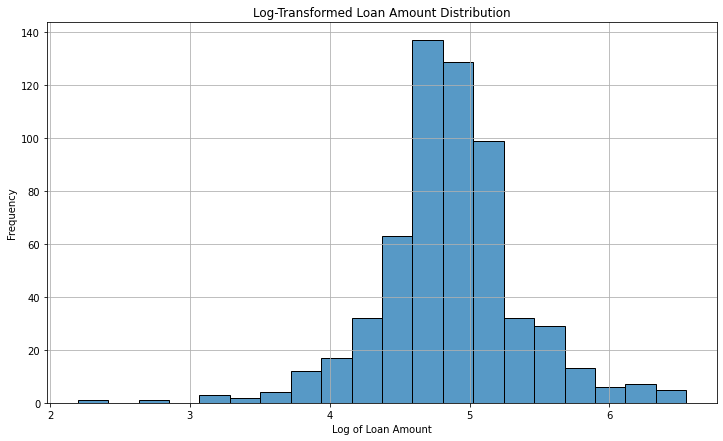

In [153]:
data['LoanAmount_log'] = np.log(data["LoanAmount"])

# Plotting the histogram for the log-transformed LoanAmount
plt.figure(figsize=(12,7))
sns.histplot(data['LoanAmount_log'], bins=20, kde=False)
plt.title("Log-Transformed Loan Amount Distribution")
plt.xlabel("Log of Loan Amount")
plt.ylabel("Frequency")
plt.grid()
plt.show()

The plot shows the distribution of log-transformed loan amounts, where the x-axis represents the logarithmic values of loan amounts, and the y-axis indicates their frequency. The transformation was applied to reduce skewness and normalize the data. The distribution is approximately bell-shaped, peaking around a log value of 5, which indicates that most loan amounts (on a log scale) cluster near this value. Although the distribution appears fairly normal, there is a slight right skew, reflecting a small number of higher loan amounts. This transformation is useful for analyzing skewed financial data and improving statistical interpretability.

# Data Cleaning and Preparation

In [154]:
# Checking for missing values
print(data.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64



Filling missing values with mean (for numerical columns) and mode (for categorical columns)

In [155]:
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)

In [156]:
data["Married"].fillna(data["Married"].mode()[0],inplace=True)

In [157]:
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace=True)

In [158]:
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)

In [159]:
data.LoanAmount= data.LoanAmount.fillna(data.LoanAmount.mean())
data.LoanAmount_log= data.LoanAmount_log.fillna(data.LoanAmount_log.mean())

In [160]:
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0],inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)

In [161]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [162]:
#This adds the ApplicantIncome and CoapplicantIncome to create Total_Income, and then applies a log transformation to create Total_Income_log.
data['Total_Income']=data["ApplicantIncome"] + data["CoapplicantIncome"]
data["Total_Income_log"]=np.log(data["Total_Income"])

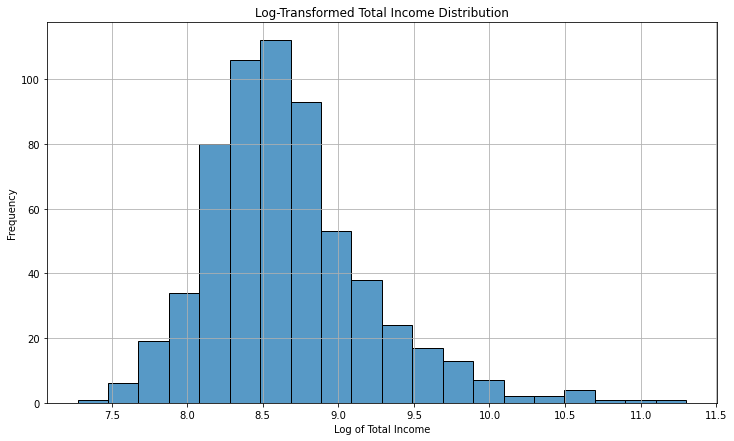

In [163]:
plt.figure(figsize=(12,7))
sns.histplot(data["Total_Income_log"], bins=20, kde=False)
plt.title("Log-Transformed Total Income Distribution")
plt.xlabel("Log of Total Income")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [164]:
# Displaying the first 5 rows of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [165]:
data.shape

(614, 16)

# Modelling

In [166]:
X = data.iloc[:, np.r_[1:5, 9:11, 13:15]].values  # Selecting specific columns for features
Y = data.iloc[:, 12].values  # Selecting the target column

In [167]:
X

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [168]:
Y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [169]:
# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [170]:
print(X_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


In machine learning, Label Encoding is a technique used to convert categorical labels (text) into numeric values so that machine learning algorithms can work with them, as most models require numeric input.

In [171]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder() 

In [172]:
#Applying Label Encoding to each of the first 5 columns (features) in the X_train
for i in range(0, 5):
    X_train[:,i]=labelencoder_X.fit_transform(X_train[:,i])

In [173]:
#Applying Label Encoding to the 8th column in the X_train
X_train[:,7]=labelencoder_X.fit_transform(X_train[:,7])

In [174]:
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [175]:
#Applying Label Encoding to the target variable (Y_train) for a supervised learning task
labelencoder_Y=LabelEncoder()
Y_train=labelencoder_Y.fit_transform(Y_train)

In [176]:
Y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [177]:
#Applying Label Encoding to each of the first 5 columns (features) in the X_test
for i in range(0, 5):
    X_test[:,i]=labelencoder_X.fit_transform(X_test[:,i])

In [178]:
#Applying Label Encoding to the 8th column in the X_test
X_test[:,7]=labelencoder_X.fit_transform(X_test[:,7])

In [179]:
#Applying Label Encoding to the target variable (Y_test) 
labelencoder_Y=LabelEncoder()
Y_test=labelencoder_Y.fit_transform(Y_test)
Y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [180]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()  # Create a StandardScaler instance
# Fit the scaler on X_train and then transform it
X_train = ss.fit_transform(X_train)

# Only transform X_test using the statistics from X_train
X_test = ss.transform(X_test)

In [181]:
print(X_train.shape)
print(X_test.shape)

(491, 8)
(123, 8)


StandardScaler is a technique to scale features so that they have a mean of 0 and a standard deviation of 1. This scaling is important for many machine learning algorithms (such as SVMs, k-NN, and neural networks) that are sensitive to the magnitude of the features. fit_transform(): Used on the training data to learn the scaling parameters (mean, std).
transform(): Used on the test data to apply the same scaling as the training data without re-fitting.

In [182]:
#Importing the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#Creating the DecisionTreeClassifier instance
DTClassifier=DecisionTreeClassifier(criterion='entropy', random_state=0)
#fit() trains the decision tree classifier on the training data
DTClassifier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

criterion='entropy': Uses Entropy to measure impurity when splitting nodes. The tree minimizes entropy to improve classification.
random_state=0: Ensures the results are reproducible by setting a fixed seed for randomness in tree construction.

In [183]:
Y_pred=DTClassifier.predict(X_test) #makes predictions using the trained Decision Tree Classifier on the test data

In [184]:
from sklearn import metrics
print("The Accuracy of Decision Tree is:", metrics.accuracy_score(Y_pred,Y_test)*100)
# function compares the predicted labels (Y_pred) with the true labels (Y_test) and calculates the accuracy of the model

The Accuracy of Decision Tree is: 59.34959349593496


In [185]:
#Importing the Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
#Initializes an instance of the Gaussian Naive Bayes classifier
NBClassifier=GaussianNB()
#Fits the Gaussian Naive Bayes model to the training data
NBClassifier.fit(X_train, Y_train)

GaussianNB()

In [186]:
Y_pred1=NBClassifier.predict(X_test) #makes predictions using the trained Naive Bayes Classifier (NBClassifier) on the test data

In [187]:
from sklearn import metrics
print("The Accuracy of Navie Bayes is:", metrics.accuracy_score(Y_pred1,Y_test)*100)
## function compares the predicted labels (Y_pred) with the true labels (Y_test) and calculates the accuracy of the model

The Accuracy of Navie Bayes is: 82.92682926829268


# Prediciton Of Loan Eligibility on Test Dataset

In [188]:
# Loading the dataset
test_data=pd.read_csv("C:/Users/salon/Desktop/projects/ML/Loan Prediction/loan-test.csv")

# Displaying the first 5 rows of the dataset
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [189]:
test_data.info() #To find the summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [190]:
test_data.isnull().sum() # Checking for missing values

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Filling missing values with mode (for categorical columns)

In [191]:
test_data["Gender"].fillna(test_data["Gender"].mode()[0],inplace=True)
test_data["Dependents"].fillna(test_data["Dependents"].mode()[0],inplace=True)
test_data["Self_Employed"].fillna(test_data["Self_Employed"].mode()[0],inplace=True)
test_data["LoanAmount"].fillna(test_data["LoanAmount"].mode()[0],inplace=True)
test_data["Loan_Amount_Term"].fillna(test_data["Loan_Amount_Term"].mode()[0],inplace=True)
test_data["Credit_History"].fillna(test_data["Credit_History"].mode()[0],inplace=True)

In [192]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

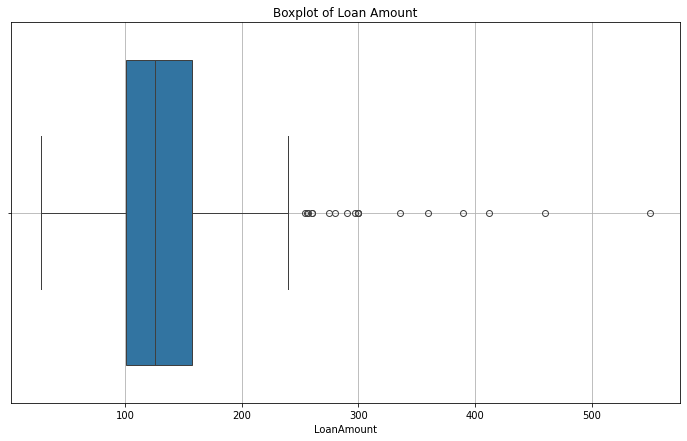

In [193]:
plt.figure(figsize=(12,7))
sns.boxplot(data=test_data, x="LoanAmount")  # Create a boxplot for the 'LoanAmount' column
plt.title("Boxplot of Loan Amount")
plt.grid()
plt.show()

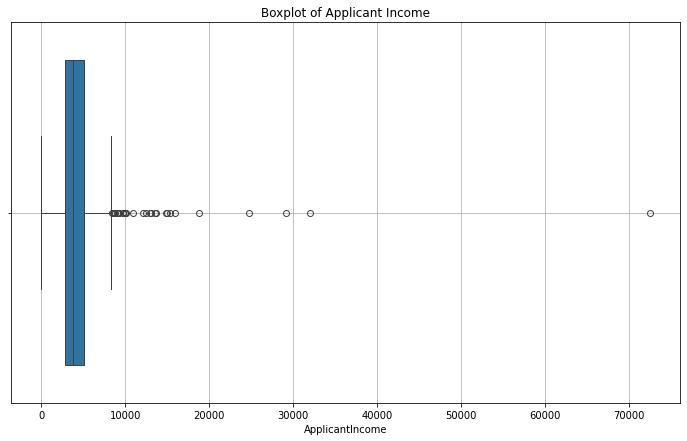

In [194]:
plt.figure(figsize=(12,7))
sns.boxplot(data=test_data, x="ApplicantIncome")  # Create a boxplot for 'ApplicantIncome' column
plt.title("Boxplot of Applicant Income")
plt.grid()
plt.show()

In [195]:
# to handle missing values in the LoanAmount column of the test_data with mean()
test_data.LoanAmount=test_data.LoanAmount.fillna(test_data.LoanAmount.mean())

In [196]:
#to store the log transformed values of the loanamount column in LoanAmount_log column
test_data["LoanAmount_log"]=np.log(test_data["LoanAmount"])

In [197]:
#This adds the ApplicantIncome and CoapplicantIncome to create Total_Income, and then applies a log transformation to create Total_Income_log.
test_data["TotalIncome"]=test_data["ApplicantIncome"]+test_data["CoapplicantIncome"]
test_data["TotalIncome_log"]=np.log(test_data["TotalIncome"])

In [198]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [199]:
print(test_data.shape)

(367, 15)


In [200]:
test=test_data.iloc[:,np.r_[1:5,9:11,13:15]].values
#test will be a numpy array containing the values from the specified columns (1:5, 9:11, 13:15) of test_data.

In [201]:
#Applying Label Encoding to each of the first 5 columns of the test array
for i in range(0,5):
    test[:,i]=labelencoder_X.fit_transform(test[:,i])

In [202]:
#Applying Label Encoding to the 8th column of the test array
test[:,7]=labelencoder_X.fit_transform(test[:,7])
test

array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], dtype=object)

In [203]:
#Applying standardization to the test array
test=ss.fit_transform(test)

In [204]:
#predictions on the transformed test data using the Naive Bayes classifier
pred=NBClassifier.predict(test)
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

# Excel File of the Loan Eligibility Predicition

In [209]:
# Convert the predicted values (0 and 1) to descriptive labels
pred_labels = ['Eligible for Loan' if x == 1 else 'Not Eligible for Loan' for x in pred]

# Add this new column to the test dataset
test_data['Loan_Eligibility'] = pred_labels

# Select relevant columns
output_data = test_data[['Loan_ID', 'Gender', 'Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Loan_Eligibility']]

# Save to Excel
output_file_path = r'C:\Users\salon\Desktop\projects\ML\Loan Prediction\loan_eligibility_predictions.xlsx'
output_data.to_excel(output_file_path, index=False, engine='xlsxwriter')

output_file_path

'C:\\Users\\salon\\Desktop\\projects\\ML\\Loan Prediction\\loan_eligibility_predictions.xlsx'